In [ ]:
import random
from numpy import linalg
from numpy.random import normal
#from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
import scipy.integrate as integrate

In [ ]:
#@jit
def func():
    N = 256 #Number of particles
    M = 10000 #Number of samples
    m = 0
    Qlist = []
    for j in range(M):
        qxx = qyy = qzz = qxy = qxz = qyz = 0
        for i in range(N):

            x, y, z = normal(),normal(),normal()
            r = np.sqrt(x**2 + y**2 + z**2)
            x, y, z = x/r, y/r, z/r

            qxx += 3*x*x-1
            qyy += 3*y*y-1
            qzz += 3*z*z-1
            qxy += 3*x*y
            qxz += 3*x*z
            qyz += 3*y*z

        qxx /= 2*N
        qyy /= 2*N
        qzz /= 2*N
        qxy /= 2*N
        qxz /= 2*N
        qyz /= 2*N

        mat = np.matrix([[qxx, qxy, qxz], [qxy, qyy, qyz], [qxz, qyz, qzz]])

        eigenvals = np.linalg.eigvals(mat)
        Q = max(eigenvals)
        Qlist.append(Q)
    return Qlist

In [ ]:
Qlist = func()

In [ ]:
np.save('3Dn256_idealgas', Qlist)

In [ ]:
np.save('3Dn500_idealgas', Qlist)

In [ ]:
N = 256

n, bins, patches = plt.hist(Qlist,   bins=181, align="left", density=True, label='test')
plt.clf()
step = (bins[181] - bins[0])/181
t = np.arange(bins[0], bins[181], step)
Exactrate = -(1/N)*np.log(n)



a = 5*N/3
A = np.sqrt((3*((2*a)**5))/np.pi)
chi = 1.0
be = 0.0

def rmt(x):
    return np.sqrt(6*a/np.pi)*(np.exp(-6*a*x*x) - (1 - (9/2)*a*x*x)*(np.exp(-(3/2)*a*x*x)))


def large_deviations_3D(x):
    M = 500
    raw_prob = np.zeros(M)
    order_parameter = np.linspace(0, 0.5, M)

    def order(x, s):
        return np.sqrt(2/3)*np.sqrt(2*s*s + 2*x*x + 2*s*x)
    def pade(x):
        return np.exp(-N*(-np.log1p(-order(x, s)) - order(x, s) + (-1/2 + 5/(2*chi))*order(x, s)**2 - (7/9 - 5/(3*chi) - be/3)*order(x, s)**3))
    def jacob(x, s):
        return (s-x)*(2*s+x)*(s+2*x)

    for i in range(M):

        s = order_parameter[i]
        temp = integrate.quad(lambda x: jacob(x, s)*pade(x), -s/2, s)[0]
        raw_prob[i] = temp


    probability = raw_prob / integrate.simps(raw_prob, order_parameter)
    rate_function = -(1/N)*np.log(probability)

    return order_parameter, probability

/home/lefterman/.conda/envs/dev-py2/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


<Figure size 640x480 with 0 Axes>

In [ ]:
s = np.arange(0,1,0.0001)
xldt, yldt = large_deviations_3D(s)

/home/lefterman/.conda/envs/dev-py2/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


500


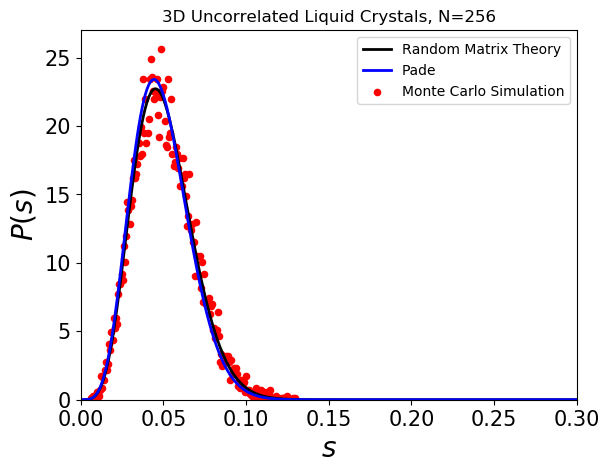

In [ ]:
C = 9.316952481857378e-08
r = len(lefteris)
print(r)
normlefteris = []

for i in range(0, r, 1):
    normlefteris.append((1/C)*lefteris[i])

s = np.arange(0,1,0.001)

plt.scatter(t, n, label='Monte Carlo Simulation', color='red', s=20, marker='o')
plt.plot(s, rmt(s), label='Random Matrix Theory', color='black', lw=2)
plt.plot(xldt, yldt, label='Pade', color='blue', lw=2)


plt.xlim(0,0.3)
plt.ylim(0,27)

plt.xlabel(r'$ s $', fontsize='20')
plt.ylabel(r'$  P(s) $', fontsize='20')
plt.tick_params(labelsize=15)
plt.title('3D Uncorrelated Liquid Crystals, N=256')
plt.legend(loc='upper right')
#plt.savefig('/Users/κωτς/Desktop/3d uncorrelated liquid crystals.pdf', transparent=True, bbox_inches='tight')